# Cleaning anomalies in time series per region slug



## Load  libraries

In [2]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

#### Run single

In [8]:
from src.runners.clean import _run_single 

2021-04-19 12:48:40.110 | INFO     | src.runners.clean:_run_single:689 - ... here we go vitoria...

2021-04-19 12:48:40.111 | DEBUG    | src.runners.clean:_reading_data:601 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('vitoria')
        
2021-04-19 12:48:41.809 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.3804499216230149
2021-04-19 12:48:41.813 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:48:41.814 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:48:41.814 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:48:41.816 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is 

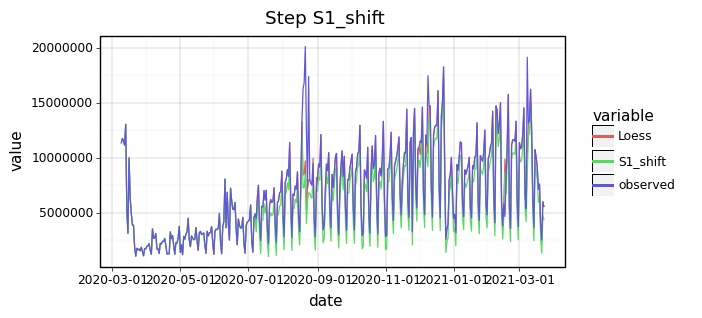

2021-04-19 12:48:43.264 | DEBUG    | src.runners.clean:_run_step:675 - ... step done ...
2021-04-19 12:48:43.269 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:48:43.270 | INFO     | src.runners.clean:_run_step:630 - Target variable: S1_shift 

2021-04-19 12:48:43.271 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:48:43.272 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

<ggplot: (8793667014353)>


2021-04-19 12:48:44.059 | DEBUG    | src.runners.clean:_run_shift_grid:339 - Total combinations: 25
2021-04-19 12:48:44.297 | DEBUG    | src.runners.clean:_initial_shift_date:416 - Shift found at 2020-12-08 00:00:00
2021-04-19 12:48:44.301 | DEBUG    | src.runners.clean:_shift_ts:439 - 

2021-04-19 12:48:44.301 | DEBUG    | src.runners.clean:_shift_ts:440 - Center point: -819502.4777216222
../src/runners/clean.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


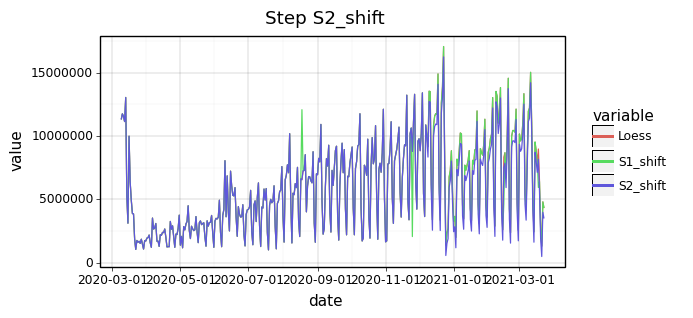

2021-04-19 12:48:44.697 | DEBUG    | src.runners.clean:_run_step:675 - ... step done ...


<ggplot: (8793673694025)>


2021-04-19 12:48:45.091 | DEBUG    | src.runners.clean:_write_missing:608 - ... writing anomalies file ...


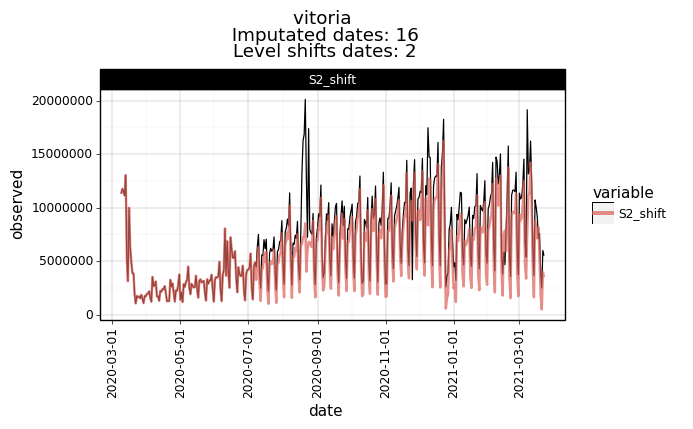

<ggplot: (8793672874629)>


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_vitoria.pdf
2021-04-19 12:48:46.982 | INFO     | src.runners.clean:_run_single:762 - ... vitoria done ...



In [10]:
daily, weekly = _run_single(region_slug='vitoria', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            print_report = False, 
                            print_plot = True)

In [11]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

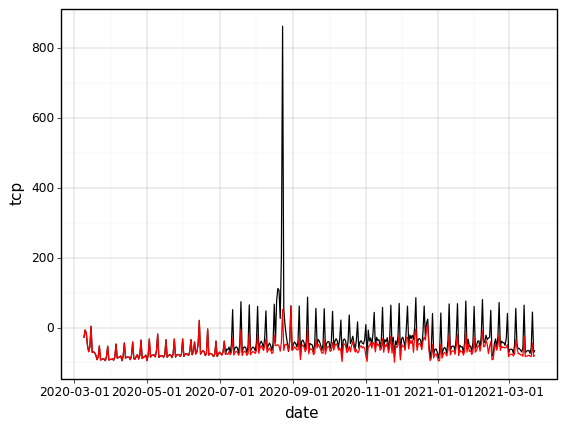

<ggplot: (8745672451097)>

In [12]:
daily.head(3)
(p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

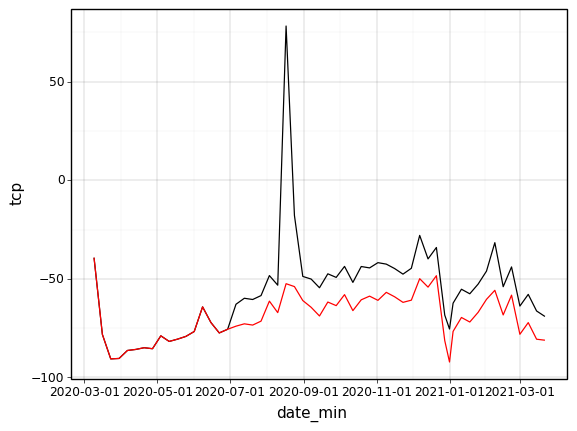

<ggplot: (8745672327693)>

In [13]:
weekly.head(3)
(p9.ggplot(weekly, p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

#### Run by batch

In [11]:
from src.runners.clean import _run_batch 

In [ ]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona")

2021-04-19 12:48:49.490 | INFO     | src.runners.clean:_run_batch:775 - Total regions process108
2021-04-19 12:48:49.491 | INFO     | src.runners.clean:_run_single:689 - ... here we go aguascalientes...

2021-04-19 12:48:49.492 | DEBUG    | src.runners.clean:_reading_data:601 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        


aguascalientes


2021-04-19 12:48:51.038 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.6731352363084672
2021-04-19 12:48:51.042 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:48:51.042 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:48:51.043 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:48:51.044 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

arequipa


2021-04-19 12:48:56.444 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.6206486994942879
2021-04-19 12:48:56.448 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:48:56.448 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:48:56.449 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:48:56.451 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

barranquilla


2021-04-19 12:49:02.001 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.7170434295252509
2021-04-19 12:49:02.005 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:02.006 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:02.006 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:02.008 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

belem


2021-04-19 12:49:07.339 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.36855976261480944
2021-04-19 12:49:07.343 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:07.344 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:07.344 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:07.346 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

belohorizonte


2021-04-19 12:49:13.149 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.3470800105405951
2021-04-19 12:49:13.153 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:13.154 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:13.154 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:13.156 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

bogota


2021-04-19 12:49:18.753 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:18.757 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:18.757 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:18.758 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:18.759 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_acre


2021-04-19 12:49:24.546 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:24.550 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:24.551 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:24.551 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:24.552 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_alagoas


2021-04-19 12:49:29.957 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:29.960 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:29.961 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:29.962 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:29.963 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_amapa


2021-04-19 12:49:35.603 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:35.607 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:35.608 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:35.608 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:35.610 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_amazonas


2021-04-19 12:49:44.547 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:44.551 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:44.552 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:44.552 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:44.554 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_bahia


2021-04-19 12:49:51.838 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:51.842 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:51.843 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:51.844 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:51.846 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_ceara


2021-04-19 12:49:58.398 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:49:58.402 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:49:58.402 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:49:58.403 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:49:58.405 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_distrito_federal


2021-04-19 12:50:05.412 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:05.416 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:05.416 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:05.417 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:05.418 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_espirito_santo


2021-04-19 12:50:11.510 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:11.514 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:11.514 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:11.515 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:11.516 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_goias


2021-04-19 12:50:17.516 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:17.520 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:17.520 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:17.522 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:17.524 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_maranhao


2021-04-19 12:50:24.268 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:24.272 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:24.273 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:24.275 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:24.277 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_mato_grosso


2021-04-19 12:50:29.969 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:29.973 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:29.974 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:29.975 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:29.978 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_mato_grosso_do_sul


2021-04-19 12:50:35.492 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:35.497 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:35.497 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:35.498 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:35.500 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_minas_gerais


2021-04-19 12:50:42.651 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:42.655 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:42.655 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:42.656 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:42.657 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_para


2021-04-19 12:50:48.259 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:48.262 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:48.263 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:48.264 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:48.265 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_paraiba


2021-04-19 12:50:55.161 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:50:55.166 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:50:55.166 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:50:55.167 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:50:55.167 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_parana


2021-04-19 12:51:00.662 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:51:00.666 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:51:00.667 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:51:00.669 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:51:00.670 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_pernambuco


2021-04-19 12:51:06.237 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-19 12:51:06.240 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-19 12:51:06.241 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-19 12:51:06.242 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-19 12:51:06.244 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

In [27]:
import pandas as pd
from siuba import *
df = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index.csv")
df.head()

,date,region_slug,observed,expected_2020,tcp,S1_Loess,S1_shift,S2_Loess,S2_shift,tcp_clean
0,2020-05-28,aguascalientes,988191,2663001.0,-62.891828,988191,988191.0,988191.0,988191.0,-62.891828
1,2020-04-30,aguascalientes,1068458,2663001.0,-59.877672,1068458,1068458.0,1068458.0,1068458.0,-59.877672
2,2020-03-19,aguascalientes,1515208,2663001.0,-43.101486,1515208,1515208.0,1515208.0,1515208.0,-43.101486
3,2020-05-21,aguascalientes,968357,2663001.0,-63.636626,968357,968357.0,968357.0,968357.0,-63.636626
4,2020-06-04,aguascalientes,1026065,2663001.0,-61.469598,1026065,1026065.0,1026065.0,1026065.0,-61.469598


In [ ]:
#plt.scatter(df.tcp, df.tcp_clean)
#df[['date', 'region_slug', 'tcp_clean']] 

In [28]:
df.head()
df.describe()

,observed,expected_2020,tcp,S1_Loess,S1_shift,S2_Loess,S2_shift,tcp_clean
count,4.104000e+04,4.104000e+04,41040.000000,4.104000e+04,4.104000e+04,4.104000e+04,4.104000e+04,41040.000000
mean,3.973451e+07,4.766712e+07,-15.012948,3.879442e+07,3.216670e+07,3.201839e+07,2.834203e+07,-43.479990
std,1.347034e+08,1.192879e+08,89.891023,1.289034e+08,1.083798e+08,1.072862e+08,9.567685e+07,43.557346
min,1.392000e+03,1.904530e+05,-99.842676,1.392000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-100.000000
25%,2.734155e+06,5.018336e+06,-64.520254,2.724817e+06,2.229462e+06,2.232264e+06,1.942761e+06,-71.563609
50%,8.990222e+06,1.329631e+07,-34.405697,8.912067e+06,7.354150e+06,7.366592e+06,6.494255e+06,-51.666379
75%,2.750872e+07,4.009847e+07,2.811364,2.702169e+07,2.266825e+07,2.261040e+07,1.930649e+07,-26.030464
max,3.742041e+09,1.312398e+09,1828.225281,2.090021e+09,1.878735e+09,1.615911e+09,1.472467e+09,474.452630


In [23]:
df.region_slug.unique()[:5]

array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte'], dtype=object)

In [29]:
(df
 >> group_by('region_slug')
 >> summarize(min_tcp = _.tcp_clean.abs().min(),
              max_tcp = _.tcp_clean.abs().max(), 
              min_baseline = _.expected_2020.abs().min()/1e6,
              max_baseline = _.expected_2020.abs().max()/1e6,
              min_observed = _.observed.abs().min()/1e6,
              max_observed = _.observed.abs().max()/1e6,
              min_cleaned = _.S2_shift.abs().min()/1e6,
              max_cleaned = _.S2_shift.abs().max()/1e6
              )
 >> arrange(_.max_tcp)
).tail(15)

,region_slug,min_tcp,max_tcp,min_baseline,max_baseline,min_observed,max_observed,min_cleaned,max_cleaned
91,sanluispotosi,0.156390,174.395738,1.810265,5.531444,0.379657,15.078238,0.379657,9.593414
63,goiania,0.153919,175.496310,4.140577,21.031585,1.818340,25.539758,1.818340,19.271350
73,manaus,0.160825,188.531483,4.711394,23.069681,1.474063,43.855084,0.000000,27.639117
78,montevideo,0.095453,196.358311,2.980042,8.646096,1.490343,30.062176,1.490343,11.060031
106,torreon,0.383593,198.690382,0.631786,0.830308,0.129918,4.854462,0.000000,2.172507
61,curitiba,1.667522,214.583228,4.647760,28.106101,1.933182,44.337458,0.000000,23.919793
23,br_states_piaui,0.119268,219.441937,4.930524,9.167334,1.396007,38.790136,1.396007,21.061958
16,br_states_mato_grosso,0.016030,232.333721,7.124668,13.122494,2.878925,186.420794,0.000000,34.327946
89,salvador,0.211545,251.537415,4.209501,31.798256,1.033705,33.612018,1.033705,32.490504
17,br_states_mato_grosso_do_sul,1.114828,251.576359,7.963288,14.359315,3.396957,115.992726,0.000000,46.248651


#### Step run

In [ ]:
df_cty = _load_data()

In [ ]:
df_run_1 = _run_step(df_run = df_cty[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
df_run_1.head()

In [ ]:
df_run_2 = _run_step(df_run = df_run_1[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
qry = """
select 
    *
from spd_sdv_waze_corona.prod_daily_weekly_index
limit 10
"""
df = pd.read_sql_query(qry, conn)

In [ ]:
df.columns #sort_values('week_number')

In [17]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [23]:
print(len(metadata.region_slug))
print(metadata.region_slug.unique())

metadata.head()

139
['country_guatemala' 'barranquilla' 'buenosaires' 'caracas'
 'br_states_maranhao' 'maracay' 'country_dominican_republic' 'saopaulo'
 'manaus' 'br_states_minas_gerais' 'montevideo' 'merida' 'ciudad_guayana'
 'br_states_amazonas' 'lapaz' 'country_peru' 'sanpedrosula'
 'country_argentina' 'br_states_rio_de_janeiro' 'cordoba'
 'country_el_salvador' 'bucaramanga' 'tijuana' 'medellin'
 'br_states_mato_grosso' 'maceio' 'br_states_pernambuco' 'guayaquil'
 'br_states_paraiba' 'country_nicaragua' 'santodomingo' 'panamacity'
 'sanfernado' 'arequipa' 'country_uruguay' 'guatemala' 'natal'
 'sanluispotosi' 'georgetown' 'br_states_santa_catarina' 'santamarta'
 'sansalvador' 'juarez' 'br_states_para' 'salvador' 'br_states_alagoas'
 'br_states_espirito_santo' 'tegucigalpa' 'country_costa_rica'
 'br_states_bahia' 'bridgetown' 'riodejaneiro' 'cucuta' 'br_states_amapa'
 'toluca' 'bogota' 'managua' 'country_honduras' 'queretaro'
 'br_states_piaui' 'leon' 'country_paraguay' 'country_guyana'
 'country_ja

,country_name,country_iso,region_slug,region_name,region_type,population,timezone,region_shapefile_wkt,osm_length,daily_coef_var,...,daily_coef_var_weekday,weekend_osm_ratio,weekday_osm_ratio,daily_approved,weekly_approved,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Guatemala,GT,country_guatemala,Guatemala,country,17915567.0,America/Guatemala,MULTIPOLYGON (((-92.2393264773401 14.541251788...,5.664239e+07,0.257001,...,0.253105,0.958859,1.153470,True,True,NaN,NaN,NaN,NaN,NaN
1,Colombia,CO,barranquilla,Barranquilla,city,1931750.0,America/Bogota,POLYGON ((-74.83374991971161 11.04958488300598...,2.609151e+06,0.316392,...,0.346008,3.327034,4.944916,True,True,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,buenosaires,Buenos Aires,city,14338718.0,America/Argentina/Buenos_Aires,POLYGON ((-58.75041764050466 -34.3670848864218...,3.033681e+07,0.326066,...,0.423715,1.914411,2.969939,True,True,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VE,caracas,Caracas,city,2408266.0,America/Caracas,POLYGON ((-67.00833333335606 10.39999999997973...,3.187649e+06,0.758516,...,1.737158,0.571506,1.639975,False,False,NaN,NaN,NaN,NaN,NaN
4,Brasil,BR,br_states_maranhao,Maranhao,state,NaN,NaN,POLYGON ((-45.84073319904228 -1.04548473090940...,7.803499e+07,0.355675,...,0.421830,0.376916,0.475001,True,True,NaN,NaN,NaN,NaN,NaN


In [31]:
metadata[metadata.region_slug == 'mexicocity'].region_shapefile_wkt.to_list()

['POLYGON ((-99.22541498771096 19.79958548078565, -99.19208165656235 19.79958548078565, -99.17541499098803 19.77458547907771, -99.15041499262657 19.77458547907771, -99.15041499262657 19.73291880956447, -99.12541499426511 19.73291880956447, -99.10041499590365 19.70791880785653, -99.06708166475504 19.71625214175918, -99.06708166475504 19.69125214005124, -98.99208166967065 19.70791880785653, -98.96708167130919 19.74125214346712, -98.92541500737342 19.69958547395388, -98.95041500573488 19.69125214005124, -98.95874833852204 19.65791880444065, -98.97541500409635 19.65791880444065, -98.96708167130919 19.63291880273271, -98.94208167294772 19.63291880273271, -98.91708167458627 19.65791880444065, -98.8754150106505 19.649585470538, -98.88374834343765 19.63291880273271, -98.90874834179911 19.63291880273271, -98.88374834343765 19.61625213492741, -98.89208167622481 19.59125213321947, -98.85041501228903 19.54125212980358, -98.85041501228903 19.49958546029035, -98.8754150106505 19.47458545858241, -98.